In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Data load

In [2]:
import pandas as pd

winequality = pd.read_csv("data/winequality-red.csv")
winequality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
winequality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
winequality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Saving figure attribute_histogram_plots


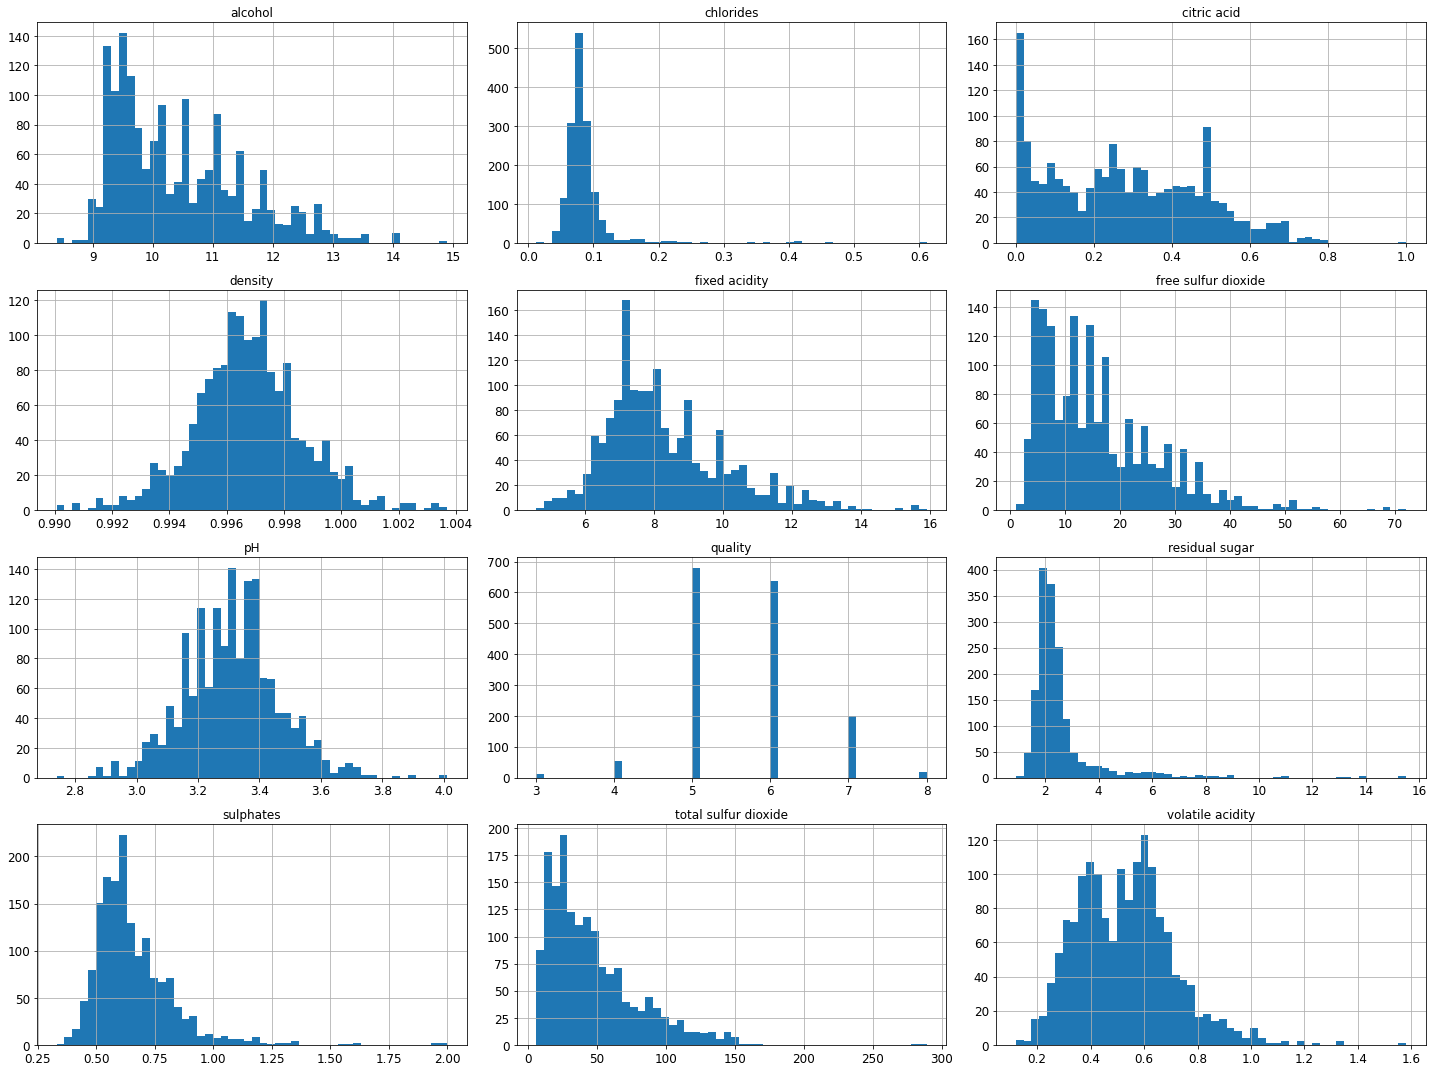

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
winequality.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

## Test Set

In [6]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [7]:
train_set, test_set = split_train_test(winequality, 0)
print(len(train_set), "train +", len(test_set), "test")

1599 train + 0 test


In [8]:
test_set.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


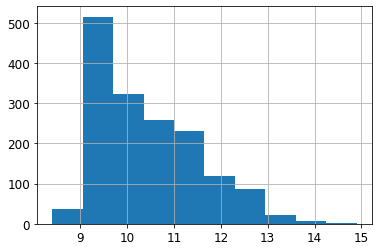

In [9]:
winequality["alcohol"].hist()

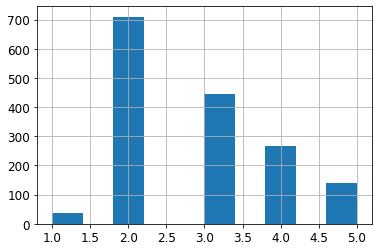

In [10]:
winequality["alcohol_cat"] = pd.cut(winequality["alcohol"],
                                   bins=[ 8, 9, 10, 11, 12, np.inf],
                                   labels=[1,2,3,4,5])
winequality["alcohol_cat"].hist()

## Visualizing Data

In [11]:
winequality = train_set.copy()

In [12]:
corr_matrix = winequality.corr()

In [13]:
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

## Prepare Data for ML

In [14]:
winequality = train_set.drop("quality", axis=1)
winequality_labels = train_set["quality"].copy()

In [15]:
winequality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
646,7.3,0.670,0.05,3.6,0.107,6.0,20.0,0.99720,3.40,0.63,10.1
751,8.3,0.650,0.10,2.9,0.089,17.0,40.0,0.99803,3.29,0.55,9.5
378,11.4,0.625,0.66,6.2,0.088,6.0,24.0,0.99880,3.11,0.99,13.3
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5
255,8.0,0.570,0.23,3.2,0.073,17.0,119.0,0.99675,3.26,0.57,9.3
...,...,...,...,...,...,...,...,...,...,...,...
853,9.3,0.360,0.39,1.5,0.080,41.0,55.0,0.99652,3.47,0.73,10.9
874,10.4,0.380,0.46,2.1,0.104,6.0,10.0,0.99664,3.12,0.65,11.8
1432,5.9,0.440,0.00,1.6,0.042,3.0,11.0,0.99440,3.48,0.85,11.7
391,13.7,0.415,0.68,2.9,0.085,17.0,43.0,1.00140,3.06,0.80,10.0


## Train Model

In [50]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(winequality,winequality_labels)

RandomForestRegressor()

In [51]:
some_data = winequality.iloc[:5]
some_labels = winequality_labels.iloc[:5]

print("Predictions:", model.predict(some_data))

Predictions: [5.11 6.68 5.83 5.04 5.26]


In [52]:
print("Labels:", list(some_labels))

Labels: [5, 7, 6, 5, 5]


In [53]:
from sklearn.metrics import mean_squared_error

winequality_predictions = model.predict(winequality)
model_mse = mean_squared_error(winequality_labels, winequality_predictions)
model_rmse = np.sqrt(model_mse)
model_rmse

0.21201009451228836

In [54]:
some_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
823,6.7,0.540,0.13,2.0,0.076,15.0,36.0,0.99730,3.61,0.64,9.8
941,9.9,0.270,0.49,5.0,0.082,9.0,17.0,0.99484,3.19,0.52,12.5
77,6.8,0.785,0.00,2.4,0.104,14.0,30.0,0.99660,3.52,0.55,10.7
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2
722,7.6,0.420,0.08,2.7,0.084,15.0,48.0,0.99680,3.21,0.59,10.0


In [55]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, winequality, winequality_labels,
                        scoring="neg_mean_squared_error", cv=10)


forest_rmse_scores = np.sqrt(-scores)

In [56]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(forest_rmse_scores)

Scores: [0.55053383 0.60793914 0.5982114  0.5489581  0.48751987 0.6633471
 0.53412604 0.57370779 0.5283169  0.52800145]
Mean: 0.5620661627319206
Standard deviation: 0.047692972972269224
